## Counts Overview
Here we take a look at number of proteins identified and quantified in each of the lymphocyte runs.

In [1]:
import load_data
data_raw=load_data.load_FragPipe(month="lymph_forPRIDE")

Here we load functions that will be used.

In [3]:
import matplotlib.pyplot as plt
from statistics import mean
import math
from numpy import isnan
import seaborn as sns

import numpy as np
import pandas as pd

Now we can get the number of non-zero values in each sample.

In [4]:
counts = data_raw.apply(np.count_nonzero)
counts

Subject1_FACS145_B_C10    1151
Subject1_FACS145_B_C11    1030
Subject1_FACS145_B_C12    1196
Subject1_FACS145_B_C13    1016
Subject1_FACS145_B_C9     1085
Subject1_FACS145_T_D10    1052
Subject1_FACS145_T_D11    1188
Subject1_FACS145_T_D12    1060
Subject1_FACS145_T_D13    1068
Subject1_FACS145_T_D9     1098
dtype: int64

In [5]:
print("Overall mean:\t",mean(counts))

samples=np.array(data_raw.columns.values)

cell_types = ['B_','T_']
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    print(cell_type,'mean:\t',mean(counts[cells_of_type]))

Overall mean:	 1094.4
B_ mean:	 1095.6
T_ mean:	 1093.2


Here we visualized that same data for clarity. 

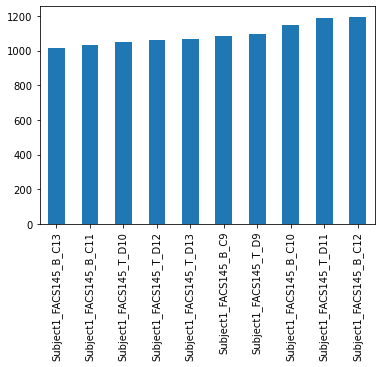

In [6]:
counts.sort_values().plot.bar()

To further improve the bar plot, we will assign a color to each type to make the replicates more distinct.

In [7]:
cell_types = ['B_','T_',]
colors = ['#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    print(cell_type)
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)
    

B_
T_


In [8]:
cells_of_type

['Subject1_FACS145_T_D10',
 'Subject1_FACS145_T_D11',
 'Subject1_FACS145_T_D12',
 'Subject1_FACS145_T_D13',
 'Subject1_FACS145_T_D9']

Replot with colors and labels.

Text(0, 0.5, 'Number of proteins')

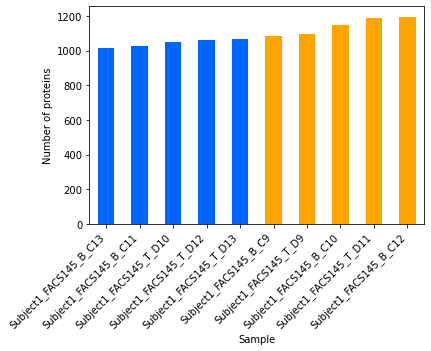

In [9]:
fig = counts.sort_values().plot.bar(color=color_by_type)
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of proteins")
#plt.show()
#plt.savefig('data/figures/protein_counts_lymph.png', dpi=300, bbox_inches='tight')

Here we see that the number of protein groups quantified in a sample ranges from about 1000 to 1200.